Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


Prepare The Data

In [ ]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df[data.feature_names]

Choose the Number of Clusters

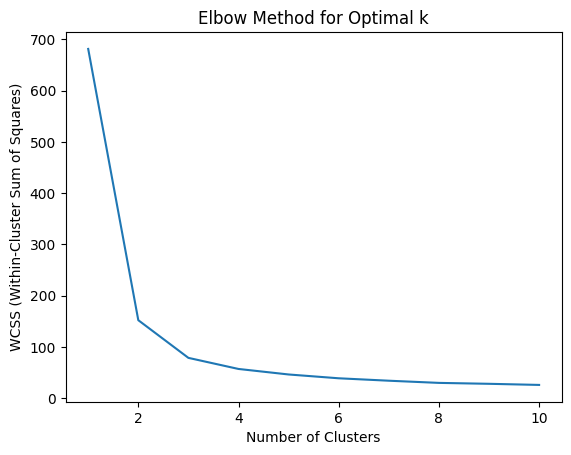

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


Using the elbow method, the optimal number of clusters is (3)

Training a K-Means model

In [ ]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=3, n_init=10, random_state=0)

Get Cluster Assignments

In [ ]:

cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels  # Add cluster labels to the DataFrame


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Visualize the Clusters

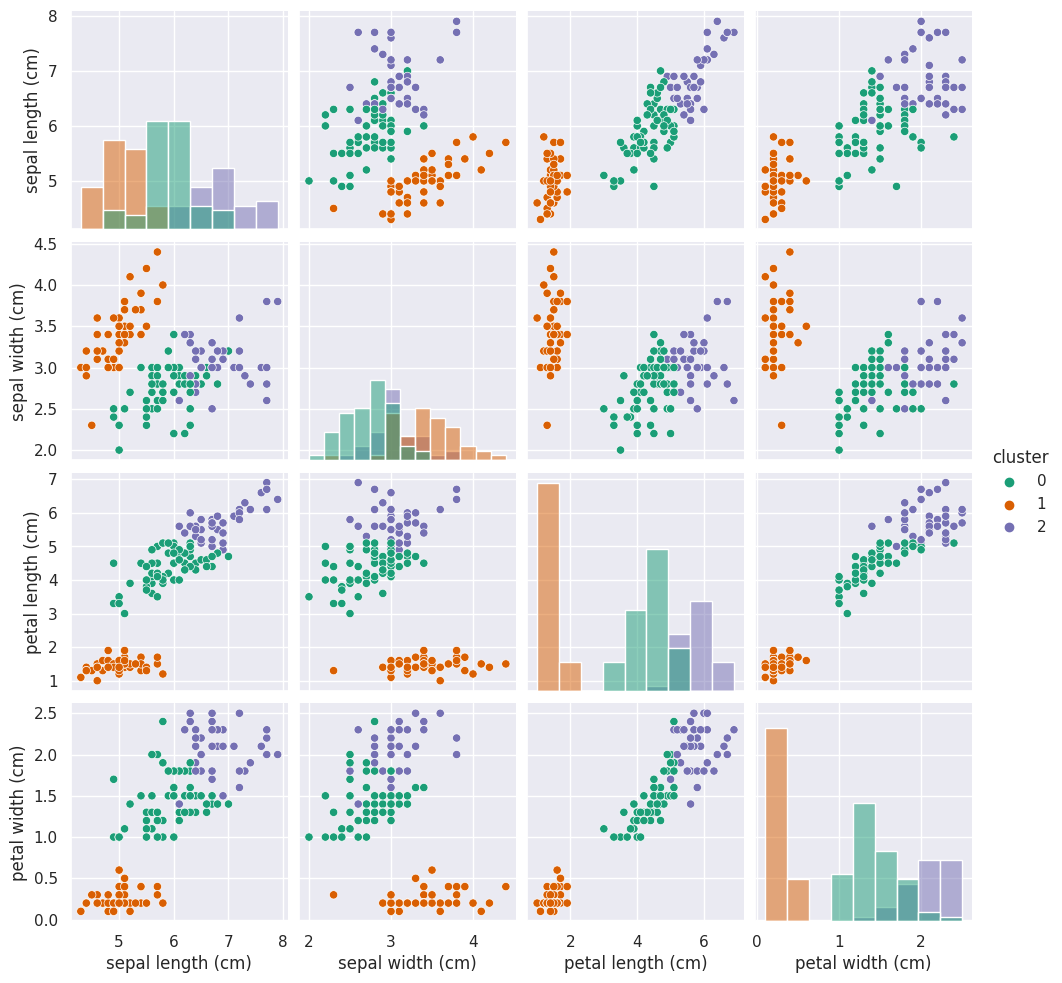

In [ ]:
#This will show the clusters of every two features
sns.set(style='darkgrid')
sns.pairplot(df, hue='cluster', palette='Dark2', diag_kind='hist')
plt.show()